# Week 10 Problem 2

If you are not using the `Assignments` tab on the course JupyterHub server to read this notebook, read [Activating the assignments tab](https://github.com/UI-DataScience/info490-fa16/blob/master/Week2/assignments/README.md).

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do **not** write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select _Kernel_, and restart the kernel and run all cells (_Restart & Run all_).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select _File_ → _Save and CheckPoint_)

5. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

In [1]:
%matplotlib inline

from nose.tools import assert_equal, assert_is_instance, assert_is_not, assert_almost_equal
from numpy.testing import assert_array_equal
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

Since we will be working with the 2001.csv data set, I'll just import it for you:

In [2]:
df = pd.read_csv(
    "/home/data_scientist/data/2001.csv", # edit this path if necessary
    encoding="latin-1",
    usecols=["DepDelay"]
    )

# PMF and CDF

In this assignment, we will compute and plot the probability mass function and cumulative distribution function of departure delay from 2001 flight data.

Before you start on this assignment, please note that the plots shown here in the instructions are just examples, not answers.  Your plots may look different (within reasonable limits, of course).

## Problem 1: Plot Probability Mass Function

Here, we will be plotting the PMF of the departure delay with a function called `plot_pmf()`.  Please note that Pandas will automatically repalce missing values (denoted by 'NA') with numpy.nan or NaN (Not A Number).  You have to remove rows with missing values.

What you should find is that the shape of the PMF depends considerably on the size of the bins.  Also, you will notice that getting the size of the bins right is difficult, and sometimes the plots are hard to interpret due to spikes.  Here are some examples:

![PMF plot 50 bins](PMF_50.png)
![PMF plot 200 bins](PMF_200.png)


As you will see, the CDF avoids these problems.

In order for your plot to be graded correctly, you MUST do the following things while graphing:

- The range of your histogram should be from -100 to 100 (this is different from your x_limit!)
- Your plot should have a title, as well as x- and y-axis labels 

In [3]:
def plot_pmf(df, column, nbins=200):
    """
    Plots the PMF of the specified column of the input Pandas dataframe.
    
    Parameters
    ----------
    df (pandas.DataFrame): input dataframe.
    column (str): target column
    
    Returns
    -------
    A matplotlib.Axes instance.
    """
    fig, ax = plt.subplots()

    # YOUR CODE HERE
    # Get the column
    x = df[column]
    # Drop all the NaN
    x.dropna(how='all')
    # Create the plot, do not show the kde, let the hist show the density rather than a count and set the range to be (-100, 100).
    sns.distplot(x, kde=False, ax=ax, bins=nbins, norm_hist=True, hist_kws={'range': (-100, 100)})
    # Set the title and labels
    ax.set_title('PMF of {}'.format(column))
    ax.set_xlabel(column)
    ax.set_ylabel('Probability')
    return ax

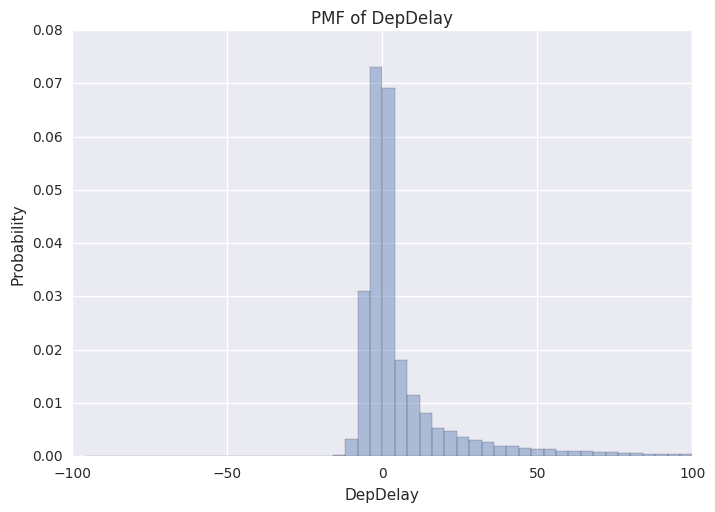

In [4]:
ax = plot_pmf(df, "DepDelay", nbins=50)

assert_is_instance(
    ax, mpl.axes.Axes,
    msg="Your function should return a matplotlib.axes.Axes object."
)

assert_is_not(
    len(ax.title.get_text()), 0,
    msg="Your plot doesn't have a title."
)

assert_is_not(
    ax.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive."
)

assert_is_not(
    ax.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive."
)

# check data
assert_equal(
    len(ax.patches), 50,
    msg="Your plot does not have enough data patches."
)

ydata = [p.get_height() for p in ax.patches]
y_hist = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.437145438800849e-08, 4.437145438800849e-08, 1.7748581755203395e-07, 1.7748581755203395e-07, 2.2185727194004246e-07, 3.549716351040679e-07, 3.106001807160594e-07, 1.0205434509241952e-06, 1.2424007228642377e-06, 2.0410869018483904e-06, 3.194744715936611e-06, 6.655718158201273e-06, 1.3843893769058649e-05, 2.2008241376452212e-05, 6.305183668536006e-05, 0.0003161022410601725, 0.0033129946418806538, 0.031025674565909624, 0.07306558651164582, 0.06908054182160439, 0.018109942879739337, 0.011478717764360245, 0.008113276063392964, 0.005265915463860071, 0.004741711101720139, 0.0037083886719321978, 0.0031210437301981294, 0.0026065123451147827, 0.0019469306756370365, 0.0019154269430215504, 0.0016361973805578132, 0.0014405636381610836, 0.0012858403767100981, 0.0010165943914836625, 0.0010616757891418792, 0.0009112565587665304, 0.0008192745338201887, 0.000741668860095562, 0.0006099300120175647, 0.0006120598418281892, 0.000528064678671689, 0.0004877310266329893, 0.0004364376253604515, 0.0004895502562628977]
assert_array_equal(ydata, y_hist)
assert_almost_equal(max(ydata),0.07306558651164582)

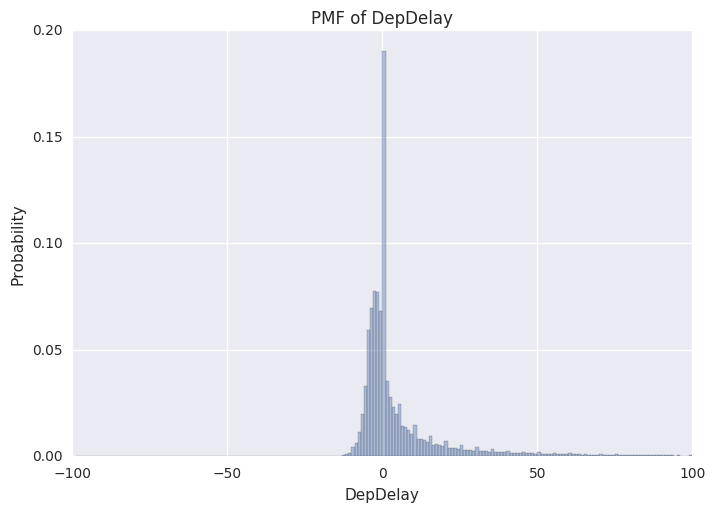

In [5]:
ax = plot_pmf(df, "DepDelay", nbins=200)

assert_is_instance(
    ax, mpl.axes.Axes,
    msg="Your function should return a matplotlib.axes.Axes object."
)

assert_is_not(
    len(ax.title.get_text()), 0,
    msg="Your plot doesn't have a title."
)

assert_is_not(
    ax.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive."
)

assert_is_not(
    ax.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive."
)

# check data
assert_equal(
    len(ax.patches), 200,
    msg="Your plot does not have enough data patches."
)

ydata = [p.get_height() for p in ax.patches]
y_hist = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7748581755203395e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7748581755203395e-07, 0.0, 3.549716351040679e-07, 1.7748581755203395e-07, 1.7748581755203395e-07, 0.0, 1.7748581755203395e-07, 3.549716351040679e-07, 1.7748581755203395e-07, 5.324574526561019e-07, 3.549716351040679e-07, 0.0, 0.0, 5.324574526561019e-07, 1.7748581755203395e-07, 3.549716351040679e-07, 3.549716351040679e-07, 5.324574526561019e-07, 5.324574526561019e-07, 0.0, 1.7748581755203395e-07, 3.549716351040679e-07, 5.324574526561019e-07, 1.4198865404162716e-06, 1.7748581755203397e-06, 1.4198865404162716e-06, 1.2424007228642377e-06, 8.874290877601698e-07, 1.4198865404162716e-06, 2.6622872632805093e-06, 1.4198865404162716e-06, 1.5973723579683056e-06, 2.4848014457284754e-06, 1.9523439930723736e-06, 4.792117073904917e-06, 2.6622872632805093e-06, 3.3722305334886455e-06, 3.7272021685927133e-06, 4.614631256352883e-06, 9.761719965361868e-06, 8.51931924249763e-06, 9.761719965361868e-06, 1.2069035593538309e-05, 1.4553837039266785e-05, 1.8990982478067634e-05, 1.4731322856818818e-05, 2.1298298106244075e-05, 2.4138071187076617e-05, 2.7865273355669333e-05, 5.64404899815468e-05, 4.508139765821663e-05, 6.265249359586799e-05, 8.803296550580885e-05, 0.0001368415653326182, 0.00026516381142273874, 0.0003015484040209057, 0.0005608551834644273, 0.0009633930176724403, 0.0017272919764163945, 0.004229487032264969, 0.006331806541168812, 0.011520249445667421, 0.01993573948489711, 0.03319534994257446, 0.0594513593904995, 0.06942162519148501, 0.0776535948953659, 0.07692963024557115, 0.06825749571416122, 0.19011659575812445, 0.03524673102184087, 0.027746535343727022, 0.02321230516272521, 0.02005288012448145, 0.024321059064972766, 0.014352213150527674, 0.013713619178975456, 0.012540082953321407, 0.010535735615706287, 0.014735405030622515, 0.008103647457790767, 0.008240489023123385, 0.007690105502894527, 0.006927981402326094, 0.009594528325227851, 0.0054321309319975515, 0.005635529678912182, 0.005350132484288512, 0.004645868760242041, 0.007050979073889653, 0.003949591897985411, 0.004058035732509705, 0.003908237702495787, 0.0034877738007150195, 0.005186135588870432, 0.0030224059870935863, 0.0031372393110497524, 0.003115408555490852, 0.002710918377289767, 0.004248655500560589, 0.002409192487451309, 0.002488173676261964, 0.0024420273636984353, 0.002221235006663705, 0.0032746133338350265, 0.0019088599677721252, 0.0020577705686982816, 0.0020096719121416805, 0.0018114202539360586, 0.002695122139527636, 0.001614943453905957, 0.0017100758521138473, 0.001641566326538762, 0.0015043697895710398, 0.0022293993542710985, 0.0013543942737395712, 0.0014566261046495426, 0.0013978782990398196, 0.0012835774325363097, 0.0019212839750007676, 0.0011595148460674378, 0.0012100983040697676, 0.0012093883607995593, 0.0011144334484092212, 0.001609441393561844, 0.0009999550960881594, 0.001061010217326059, 0.0010590578733329866, 0.0009463543791874451, 0.0014914133248897414, 0.0008954159495500113, 0.0009388999748502596, 0.0009209739072775043, 0.0008435900908248175, 0.0012049512153607586, 0.0007832449128571258, 0.0008132400160234196, 0.0007931841186400398, 0.0007530723238732801, 0.0010478762668272084, 0.0006829654259402267, 0.0007110081851134481, 0.0006829654259402267, 0.0006595372980233582, 0.0009131645313052147, 0.0006036292654944675, 0.0006251050494182636, 0.0006396588864575304, 0.0005713268466999974, 0.0007999285797070171, 0.000543284087526776, 0.0005635174707277078, 0.0005415092293512556, 0.0005017524062196, 0.0006865151422912674, 0.00046590027107408917, 0.0004580908951017997, 0.00048826348408564544, 0.00045649352274383133, 0.0006029193222242594, 0.00040324777747822115, 0.0004273858486652978, 0.0004170916712472798, 0.0003803521070140088, 0.0005209208745152197, 0.0003647333550694298, 0.00037857724883848845, 0.00037999713537890473, 0.0008348932857647677]
assert_array_equal(ydata, y_hist)
assert_almost_equal(max(ydata),0.19011659575812445)
assert_almost_equal(min(ydata),0)

## Problem 2: Find the Cumulative Distribution Function

Here, we will be writing a function named `get_cdf()` that takes an array and returns a tuple that represents the `x` and `y` axes of the empirical CDF

But before we do this, consider what Wikipedia has to say about [empirical distibution functions](https://en.wikipedia.org/wiki/Empirical_distribution_function):

$$CDF(t)=\frac{1}{n} \cdot \text{(number of elements in the sample} \leq t)$$

So, given the array, e.g. `[1, 2, 2, 3, 5]`, you could go through each value and count the number of elements smaller than 1, smaller than 2, etc. However, this method will be very inefficient and slow when teh input array is very large.  In python, when you are dealing with numerical operations on a potentially huge array, you should think of using Numpy (because the `for` loop of pure Python is very slow and often leads to code that is difficult to read and maintain).

Here is a faster algorithm to produce the empirical CDF.  As an example, suppose the array has values `[2, 1, 2, 5, 3]`. 

1. Use numpy.sort() to sort the array (wiht no missing values) in ascending order.  In our case, this will result in:
    `[1, 2, 2, 3, 5]`
    This will be our x-axis of our CDF.

2. Create an array of $0, \frac{1}{N}, \frac{2}{N}, ..., 1-\frac{1}{N} $ where $N$ is the length of th einput array (5 in our example.  In our case, this will result in:
    `[0.0, 0.2, 0.4, 0.6, 0.8]`
    This will be our y-axis.  An easy way of doing this is using Numpy's arange() function and then dividing by N.
    
Once this is done, it is fairly simple to plot the CDF: simply use the x-axis found in step 1 and the y-axis from step 2.

According to Wikipedia, the resulting empirical CDF is an unbiased estimator for the true CDF.

Note: DO NOT use numpy.historgram() to create a cdf.  It uses binning, which might be useful in othercases, but not in this case.  The method I outlined above is a better characterization of the true CDF.


In [6]:
def get_cdf(df, column):
    '''
    Reads a specific column of a Pandas DataFrame,
    and returns a tuple of arrays that represent the x and y axes of
    cumulative distribution function.
    
    Parameters
    ----------
    df (pandas.DataFrame): A pandas.DataFrame.
    column (str): The header of the target column in df.
    
    Returns
    -------
    A tuple of two numpy arrays of equal length.
    The first array represents the x axis of CDF.
    The second array represents the y axis of CDF.
    '''
    
    # YOUR CODE HERE
    # Delete all the NaN
    x = df[column].dropna(how='all')
    n = len(x)
    # Get cdf_x by sorting the data
    cdf_x = x.sort_values()
    # Get cdf_y
    cdf_y = np.arange(n)/n
    return cdf_x, cdf_y

Make sure that your function passes all the tests.

In [7]:
test1 = pd.DataFrame(
    {
        "a": [1, 2, 2, 3, 5],
        "b": [3, 2, 5, 1, 2],
        }
    )

answer1 = np.array([1, 2, 2, 3, 5]), np.array([0.0, 0.2, 0.4, 0.6, 0.8])

np.testing.assert_allclose(get_cdf(test1, "a")[0], answer1[0])
np.testing.assert_allclose(get_cdf(test1, "a")[1], answer1[1])

np.testing.assert_allclose(get_cdf(test1, "b")[0], answer1[0])
np.testing.assert_allclose(get_cdf(test1, "b")[1], answer1[1])

test2 = pd.DataFrame(
    {
        "c": [1, 2, 2, 3, 5, np.nan],
        "d": [3, 2, 5, np.nan, 2, 1],
        }
    )

answer2 = np.array([1, 2, 2, 3, 5]), np.array([0.0, 0.2, 0.4, 0.6, 0.8])

np.testing.assert_allclose(get_cdf(test2, "c")[0], answer2[0])
np.testing.assert_allclose(get_cdf(test2, "c")[1], answer2[1])

np.testing.assert_allclose(get_cdf(test2, "d")[0], answer2[0])
np.testing.assert_allclose(get_cdf(test2, "d")[1], answer2[1])

## Problem 3: Plot the CDF

Finally, now that you have a working way of finding the CDF of a set of data, let's put it to good use.  Let's use get_cdf() to create a CDF of the DepDelay column in 2001.csv, and then plot that data.  An example of this is shown below:

![CDF plot](CDFplot.png)

In order for your plot to pass it must have the following characteristics:
- it must have a title, and an x- and y-axis title 
- the range of your x axis must be from -50 to 150


In [8]:
def plot_CDF():
    """
    Plots the CDF 
    
    Parameters
    ----------
    None
    
    Returns
    -------
    A matplotlib.Axes instance.
    """
    
    fig, ax = plt.subplots()

    # YOUR CODE HERE
    global df
    # Get x and y of the cdf
    (x, y) = get_cdf(df, "DepDelay")
    # Create the plot
    ax.plot(x, y)
    # Set the range
    ax.set_xlim(-50, 150)
    # Set the title and labels
    ax.set_title('CDF of Departure Delay in 2001')
    ax.set_xlabel('Departure Delay(min)')
    ax.set_ylabel('Probability')
    return ax

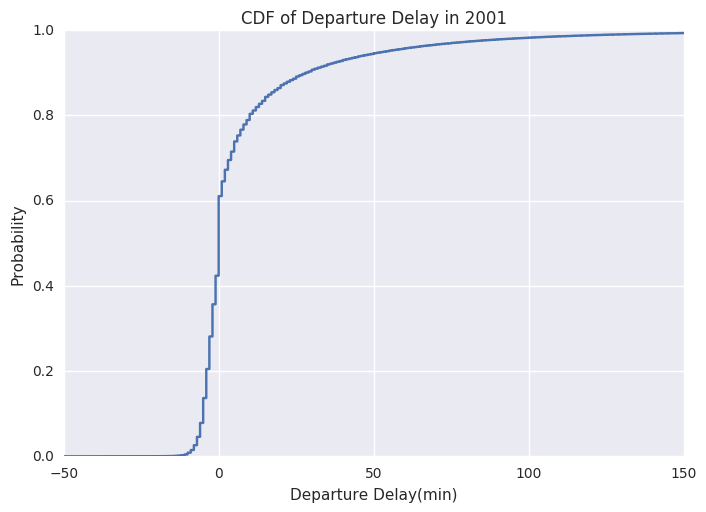

In [9]:
ax = plot_CDF()
assert_is_instance(
    ax, mpl.axes.Axes,
    msg="Your function should return a matplotlib.axes.Axes object."
)

assert_equal(len(ax.lines), 1)

assert_is_not(
    len(ax.title.get_text()), 0,
    msg="Your plot doesn't have a title."
)
assert_is_not(
    ax.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive."
)
assert_is_not(
    ax.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive."
)
    
x, y = ax.lines[0].get_xydata().T
assert_almost_equal(x.min(), -204.0)
assert_almost_equal(y.min(), 0)
assert_almost_equal(x.max(), 1692.0)
assert_almost_equal(y.max(), 0.99999982568)